In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
events_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")

In [3]:
submissions_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")

In [4]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [5]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [9]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [10]:
events_data['day'] = events_data.date.dt.date

In [11]:
submissions_data['day'] = submissions_data.date.dt.date

In [12]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


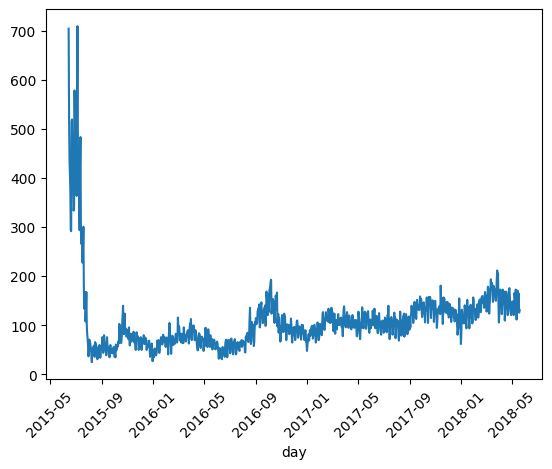

In [13]:
events_data.groupby('day') \
    .user_id.nunique().plot().tick_params(axis='x', rotation=45)

In [14]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot: >

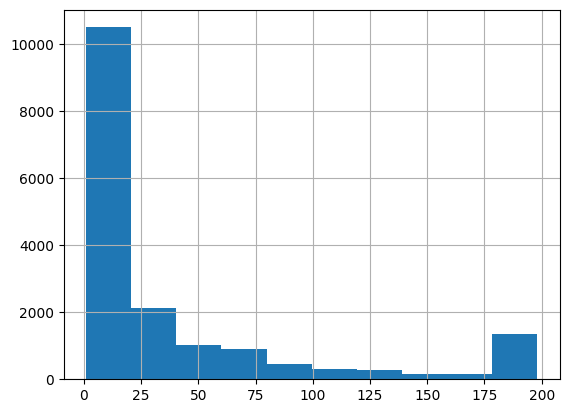

In [15]:
events_data[events_data.action == "passed"] \
    .groupby('user_id', as_index=False) \
    .agg({"step_id": "count"}) \
    .rename(columns={"step_id": "passed_steps"}).passed_steps.hist()

In [16]:
users_events_data = events_data.pivot_table(index="user_id",
                        columns="action",
                        values="step_id", aggfunc='count',
                        fill_value=0).reset_index()

In [17]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [18]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [19]:
users_scores = submissions_data.pivot_table(index="user_id",
                        columns="submission_status",
                        values="step_id", aggfunc='count',
                        fill_value=0).reset_index()

In [20]:
users_scores[users_scores.correct == users_scores.correct.max()]

submission_status,user_id,correct,wrong
439,1046,421,513


In [21]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [22]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot: >

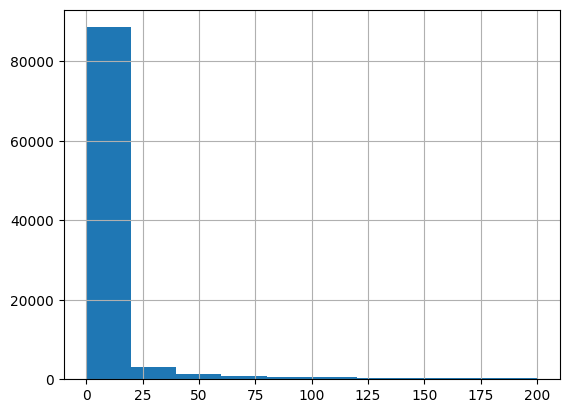

In [24]:
gap_data[gap_data < 200].hist()

In [25]:
gap_data.quantile(0.95)

59.760440972222156

In [26]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [27]:
users_data = events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp': "max"}).rename(columns={'timestamp': 'last_timestamp'})

In [28]:
now = 1526772811

In [29]:
drop_out_threshold = 2592000

In [30]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [31]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [32]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [33]:
users_data = users_data.merge(users_scores, on='user_id', how='outer').head()

In [34]:
users_data = users_data.fillna(0)

In [35]:
users_data = users_data.merge(users_events_data, how='outer')

In [36]:
users_days = events_data.groupby('user_id').day.nunique()

In [37]:
users_days = users_days.to_frame().reset_index()

In [38]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [39]:
users_data = users_data.merge(users_days, how='outer')

In [40]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [41]:
users_data['passed_corse'] = users_data.passed > 170

In [42]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False


In [45]:
users_data[users_data.passed_corse].day.median()

20.0

In [55]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [73]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [74]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [75]:
users_data = users_data.merge(user_min_time, how='outer')

In [76]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [72]:
event_data_train = pd.DataFrame()

In [71]:
#for user_id in users_data.user_id:
#    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#    time_threshold = min_user_time + 3 * 24 * 60 * 60
#    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
#    
#    pd.concat([event_data_train, user_events_data])

KeyboardInterrupt: 

In [ ]:
event_data_train.head()

In [77]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [80]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [81]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [82]:
learning_time_threshold = 3 * 24 * 60 * 60

In [84]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [85]:
user_learning_time_threshold 

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [86]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [87]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [88]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [124]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [125]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [ ]:
# 2_10_7

In [5]:
submit_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")

FileNotFoundError: [Errno 2] No such file or directory: 'submissions_data_train.csv'

In [99]:
submit_data[submit_data.submission_status == 'wrong'].step_id.value_counts()

31978    16084
32031    13373
32202    13002
33481    10300
32075    10003
         ...  
33482      707
33681      703
33362      673
32175      342
32929       85
Name: step_id, Length: 76, dtype: int64

In [100]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [102]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [103]:
submissions_data['user_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.user_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [206]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})

In [207]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [208]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'})

In [209]:
X = X.merge(steps_tried)

In [210]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [211]:
X.shape

(8913, 3)

In [212]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                  columns='submission_status',
                                  values='step_id',
                                  aggfunc='count',
                                  fill_value=0).reset_index())

In [213]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [214]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [215]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                                  columns='action',
                                  values='step_id',
                                  aggfunc='count',
                                  fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [216]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [217]:
X = X.fillna(0)

In [218]:
X = X.merge(users_data[['user_id', 'passed_corse', 'is_gone_user']], how='outer')

In [219]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [220]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,NaN
3,14,1.0,1.0,0.0,1.0,0.00,9,False,NaN
4,16,3.0,23.0,23.0,27.0,0.46,132,True,NaN


In [221]:
y = X.passed_corse.map(int)

In [222]:
X = X.drop(['passed_corse', 'is_gone_user'], axis=1)

In [223]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [224]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)